In [59]:
pip install scanpy


Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad

from matplotlib.pyplot import rc_context


In [61]:
he48 = ad.read_h5ad("/Users/sarahweber/Desktop/Bio296/bio265_project/he48_processed.h5ad")


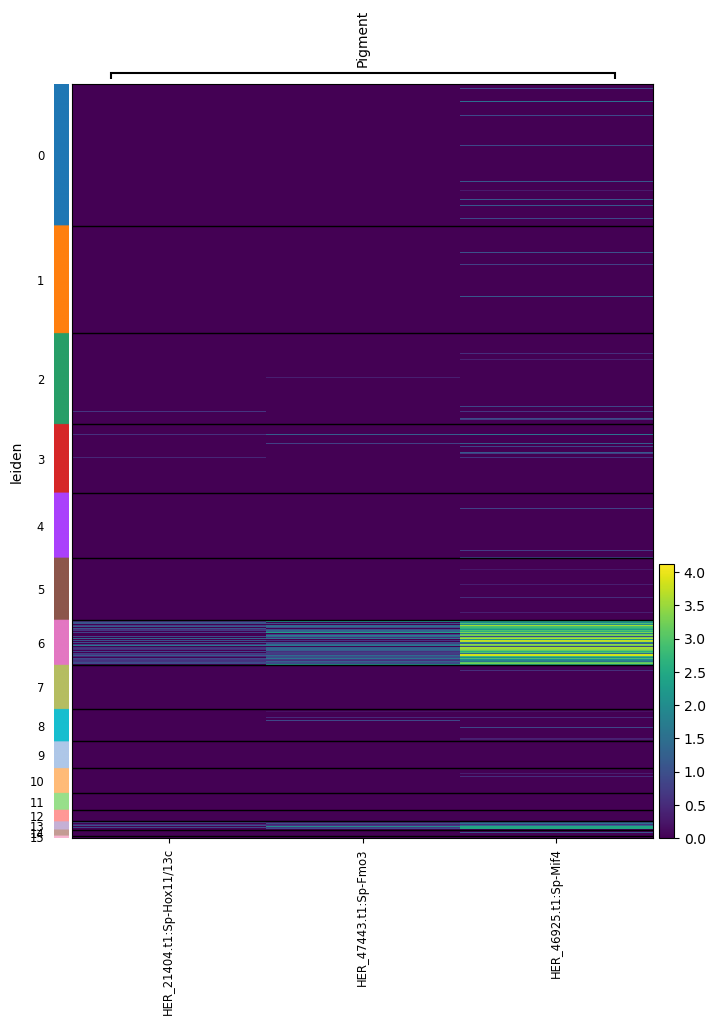

In [77]:
#heat map, three markers of pigment cells expressed in clusters 6 and 13 

marker_genes_dict = {
"Pigment": ["HER_21404.t1:Sp-Hox11/13c", "HER_47443.t1:Sp-Fmo3", "HER_46925.t1:Sp-Mif4"]
}

ax = sc.pl.heatmap(
    he48, marker_genes_dict, groupby="leiden", cmap="viridis", dendrogram=False, figsize=(8,10)
)
            

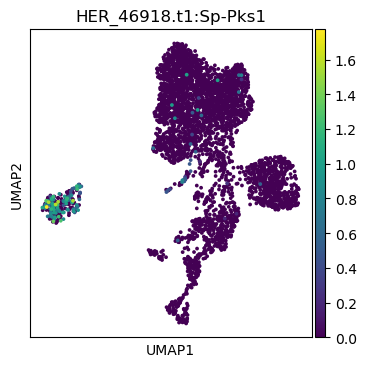

In [91]:
#UMAP of Pks1 a known marker of pigment cells

with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(he48, color="HER_46918.t1:Sp-Pks1", save='sarah_umap1.png')

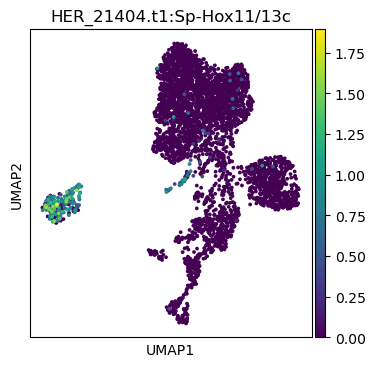

In [97]:
#UMAP of hox gene, coexpressed with Pks1 in pigment cells 

with rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(he48, color="HER_21404.t1:Sp-Hox11/13c", save='sarah_umap2.png')

categories: 0, 1, 2, etc.
var_group_labels: 6


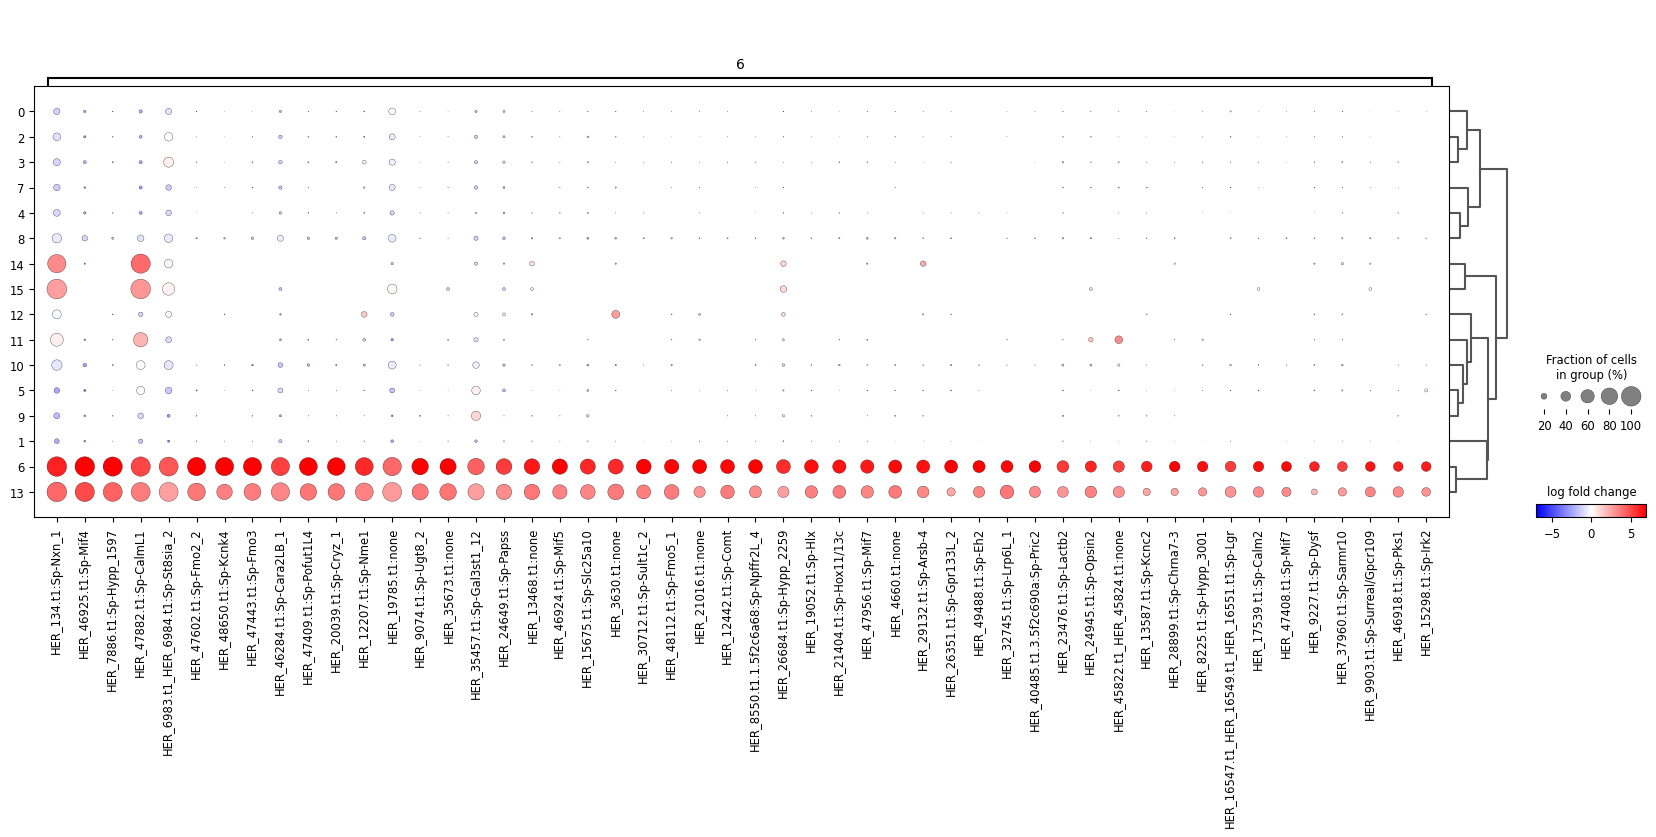

In [93]:
#clusters 6 and 13 have similar expression profiles (looked at top 50 genes in each cluster)

sc.pl.rank_genes_groups_dotplot(he48,
    n_genes=50,
    values_to_plot="logfoldchanges",
    min_logfoldchange=4,
    vmax=7,
    vmin=-7,
    cmap="bwr",
    groups=["6"],
    save='sarah_dotplot.png')